In [47]:
import qiskit
import numpy as np
import matplotlib as mpl

In [48]:
def BinaryEmbedding(a):
    a_bin = bin(a)
    n = len(a_bin) - 2
    return a_bin, n

In [49]:
def encodeCircuit(a, b):
    a_bin, n = BinaryEmbedding(a)
    b_bin, m = BinaryEmbedding(b)
    qc = qiskit.QuantumCircuit(n + m + 1, n + m + 1)
    # qubits represeting a range from 1 to n
    for i in range(n):
        if a_bin[i + 2] == '1':
            qc.x(i+1)
    # qubits represeting b range from n+1 to n+m
    for j in range(m):
        if b_bin[j + 2] == '1':
            qc.x(j + n + 1)
    return qc, n, m

In [50]:
def qft(qc,n):
    for qubit in range(n+1):
        qc.h(qubit)
        for j in range(qubit+1, n+1):
            qc.cp(np.pi/2**(n-qubit), j, qubit)
        qc.barrier()
    return qc

In [ ]:
def gen_r_k(k, j):
    # kth rz gate for quantum fourier addition
    return qiskit.circuit.library.RZGate(k * np.pi / 2**j)

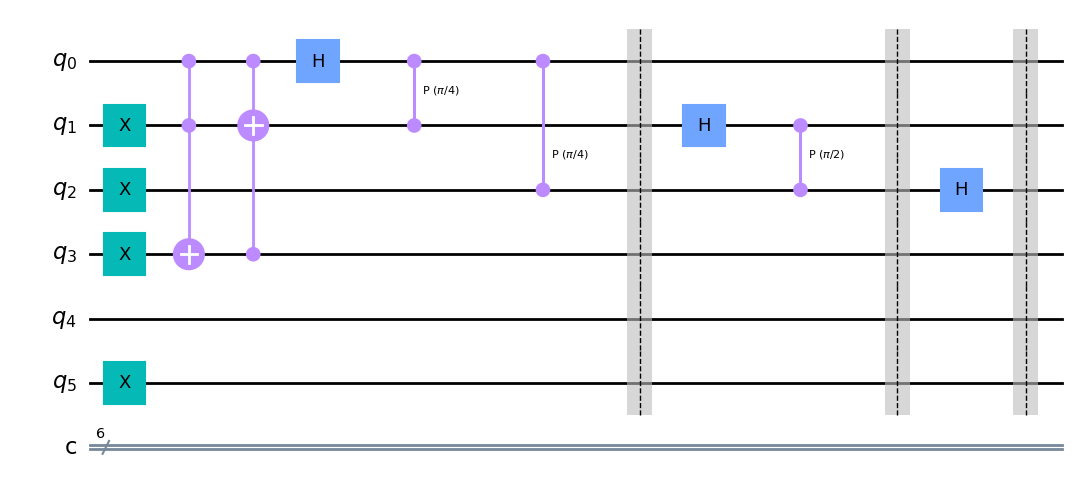

In [51]:
def Comparator(a, b):
    qc, n, m = encodeCircuit(a, b)
    qc.ccx(0, 1, n+1)
    qc.ccx(0, n+1, 1)

    qft(qc, n)
    return qc

qc = Comparator(3, 5)
qc.draw(output='mpl')
